## Network Construction

### 1. Creating Full Network

In [2]:
## Waiting from Erin for full version 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#### 1.1 Ensure accurate transition probability matrix

##### 1.1.1 Network Creation. Transition Matrix

In [48]:
job_hop_count_empty = pd.read_csv("data/job_hop_count_empty.csv")

Question: From where did you create this? 

In [39]:
sorted = pd.read_csv("job_sorted_file.csv",index_col = 0)

In [47]:
sorted['ONET'][sorted['ONET'].apply(lambda x: float(x.replace("-", ""))).apply(lambda x: x - int(x) != 0)].sort_values(ascending = True)

ID
SEwGjREUL4cpJYj-6Nhz5A_0000    11-3031.01
a7B5CRCZR93rZWj6YzFJzw_0000    11-3031.01
a7B5CRCZR93rZWj6YzFJzw_0000    11-3031.01
AevpjzNkOJqqaKgkrCGwXw_0000    11-3031.01
99pwnSjtTwAtVYP0eRp1sw_0000    11-3031.01
                                  ...    
prB6R5BeBbBeyt0CDQbUog_0000    35-3023.01
KuP-Y8m3notoE1QW1BkyGg_0000    39-9011.01
26tK5VYEj0VSf60shSzd1w_0000    39-9011.01
ZoPnB6wkwjvhWGAN1Q3WGA_0000    39-9011.01
EXEI5R5x2k2bnz1dtaBpaA_0000    41-4011.07
Name: ONET, Length: 105, dtype: object

In [40]:
sorted[sorted['ONET'] == '11-1011.03']

,TITLE_RAW,COMPANY_RAW,JOB_START_DATE,JOB_END_DATE,COMPANY,COMPANY_NAME,NAICS6_NAME,NAICS6,TITLE,TITLE_NAME,...,SOC_2021_4_NAME,SOC_2021_5_NAME,SOC_2021_2,SOC_2021_3,SOC_2021_4,SOC_2021_5,NAICS_2017_6,NAICS_2017_6_NAME,NAICS_2022_6,NAICS_2022_6_NAME
ID,,,,,,,,,,,,,,,,,,,,,


Question: There seems to be no 11-1011.03 in the sorted matrix. why is it there in the transition matrix?

##### 1.1.2 Transition Probability Matrix

In [3]:
import pandas as pd

In [41]:
## Simple version for now. 

transitions = pd.read_csv("job_hop_count_final.csv", index_col=0)
transition_probaility = pd.read_csv("job_hop_count_percentages_final.csv", index_col=0)

In [42]:
transitions

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
ONET (row->col),,,,,,,,,,,,,,,,,,,,,
11-1011.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11-1011.03,6,0,0,0,0,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11-1021.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11-1031.00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11-2011.00,2,0,3,0,0,0,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55-3014.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55-3015.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55-3016.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
transition_probaility.sum()

NameError: name 'transition_probaility' is not defined

In [51]:
# Define transition probability cutoff, theta, to be 5%. 
theta = 0.05

In [54]:
transition_probaility_modified = transition_probaility.mask(transition_probaility <theta, 0 )

In [58]:
(transition_probaility_modified != transition_probaility).sum().sum()

1273

In [61]:
(transition_probaility>0).sum().sum()

1273

In [66]:
transition_probaility.sum(axis =1)

ONET (row->col)
11-1011.00    0.000000
11-1011.03    0.034507
11-1021.00    0.000000
11-1031.00    0.002070
11-2011.00    0.025535
                ...   
55-3014.00    0.000000
55-3015.00    0.000000
55-3016.00    0.000000
55-3018.00    0.000000
55-3019.00    0.015183
Length: 1016, dtype: float64

Issue: Columns must sum to one. They don't. Divde by the sum of the row, not the sum of the entire dataframe.

#### 1.2 Revising Transition Matrix 

In [68]:
transitions.sum(axis = 1)

ONET (row->col)
11-1011.00     0
11-1011.03    50
11-1021.00     0
11-1031.00     3
11-2011.00    37
              ..
55-3014.00     0
55-3015.00     0
55-3016.00     0
55-3018.00     0
55-3019.00    22
Length: 1016, dtype: int64

In [74]:
normalized_transitions = transitions.div(transitions.sum(axis = 1), axis=0).replace(np.nan, 0)

In [77]:
normalized_transitions

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
ONET (row->col),,,,,,,,,,,,,,,,,,,,,
11-1011.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1011.03,0.120000,0.0,0.000000,0.0,0.0,0.08,0.080000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1021.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1031.00,0.000000,0.0,0.333333,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-2011.00,0.054054,0.0,0.081081,0.0,0.0,0.00,0.135135,0.027027,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55-3014.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-3015.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-3016.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
zero_tp = normalized_transitions[normalized_transitions.sum(axis = 1) == 0 ]

In [83]:
tp = normalized_transitions[normalized_transitions.sum(axis = 1) >0 ]

In [84]:
len(tp)/len(normalized_transitions)

0.30118110236220474

about 70% of the occupations are dead ends (for now).

### 2. Creating Occupation-Specific Network

#### 2.1 Transition Probaility Cutoff, $\phi$

In [91]:
# PARAMETER 1: Define transition probability cutoff, theta, to be 5%. 
theta = 0.05

In [97]:
# Implement cutoff
normalized_transitions_mod = normalized_transitions.mask(normalized_transitions <theta, 0 )

In [98]:
# Total non-zero transitions
(normalized_transitions>0).sum().sum()

1273

In [99]:
# Number of non-zero transitions that were cutoff
(normalized_transitions != normalized_transitions_mod).sum().sum()

244

In [100]:
normalized_transitions_mod

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
ONET (row->col),,,,,,,,,,,,,,,,,,,,,
11-1011.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1011.03,0.120000,0.0,0.000000,0.0,0.0,0.08,0.080000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1021.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-1031.00,0.000000,0.0,0.333333,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11-2011.00,0.054054,0.0,0.081081,0.0,0.0,0.00,0.135135,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55-3014.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-3015.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55-3016.00,0.000000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# PARAMETER 2: Path Length Cutoff, big_theta
# Note: Pre-set from Axelle's Thesis. Details for computing this is in Appendix A.1.
big_theta = 7 
 

#### 2.2 Path Length Cutoff, $\theta$

Graph representation with NetworkX

In [117]:
DG = nx.DiGraph()

In [113]:
DG.add_nodes_from(normalized_transitions_mod.index.tolist())

In [114]:
for node in DG.nodes():
    print("Node", node, "exists in the graph")

Node 11-1011.00 exists in the graph
Node 11-1011.03 exists in the graph
Node 11-1021.00 exists in the graph
Node 11-1031.00 exists in the graph
Node 11-2011.00 exists in the graph
Node 11-2021.00 exists in the graph
Node 11-2022.00 exists in the graph
Node 11-2032.00 exists in the graph
Node 11-2033.00 exists in the graph
Node 11-3012.00 exists in the graph
Node 11-3013.00 exists in the graph
Node 11-3013.01 exists in the graph
Node 11-3021.00 exists in the graph
Node 11-3031.00 exists in the graph
Node 11-3031.01 exists in the graph
Node 11-3031.03 exists in the graph
Node 11-3051.00 exists in the graph
Node 11-3051.01 exists in the graph
Node 11-3051.02 exists in the graph
Node 11-3051.03 exists in the graph
Node 11-3051.04 exists in the graph
Node 11-3051.06 exists in the graph
Node 11-3061.00 exists in the graph
Node 11-3071.00 exists in the graph
Node 11-3071.04 exists in the graph
Node 11-3111.00 exists in the graph
Node 11-3121.00 exists in the graph
Node 11-3131.00 exists in th

In [120]:
# Add edges with weights from the DataFrame
for i, row in normalized_transitions_mod.iterrows():
    for j, weight in row.items():
        if weight != 0:  # Only add edges with non-zero weights
            DG.add_edge(i, j, weight=weight)

In [121]:
for edge in DG.edges(data=True):
    print("Edge:", edge)

Edge: ('11-1011.03', '11-1011.00', {'weight': 0.12})
Edge: ('11-1011.03', '11-2021.00', {'weight': 0.08})
Edge: ('11-1011.03', '11-2022.00', {'weight': 0.08})
Edge: ('11-1011.03', '11-9199.00', {'weight': 0.08})
Edge: ('11-1011.03', '41-1011.00', {'weight': 0.1})
Edge: ('11-2021.00', '11-1011.00', {'weight': 0.11428571428571428})
Edge: ('11-2021.00', '11-1021.00', {'weight': 0.05714285714285714})
Edge: ('11-2021.00', '11-2021.00', {'weight': 0.14285714285714285})
Edge: ('11-2021.00', '11-3031.00', {'weight': 0.05714285714285714})
Edge: ('11-2021.00', '11-9199.00', {'weight': 0.05714285714285714})
Edge: ('11-2021.00', '13-1071.00', {'weight': 0.05714285714285714})
Edge: ('11-2021.00', '41-4012.00', {'weight': 0.05714285714285714})
Edge: ('11-2022.00', '11-3021.00', {'weight': 0.08333333333333333})
Edge: ('11-2022.00', '11-3131.00', {'weight': 0.08333333333333333})
Edge: ('11-2022.00', '11-9032.00', {'weight': 0.08333333333333333})
Edge: ('11-2022.00', '11-9199.00', {'weight': 0.16666666

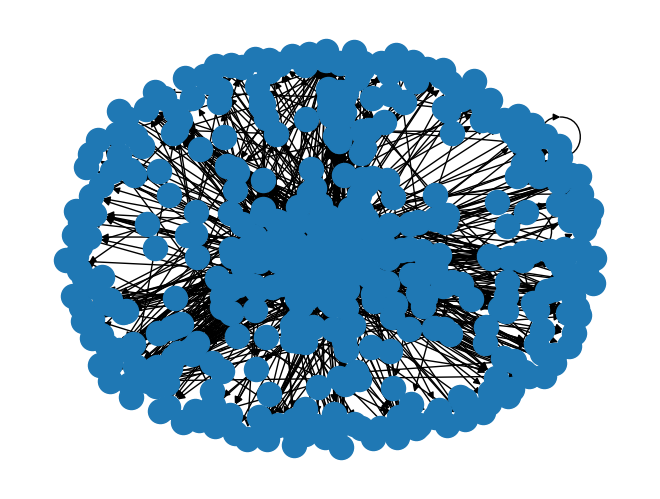

In [134]:
# Draw the graph
nx.draw(DG, with_labels = False)

In [137]:
start_node = '11-1011.03'
reachable_nodes = nx.descendants(DG, start_node)
subgraph = DG.subgraph(reachable_nodes)


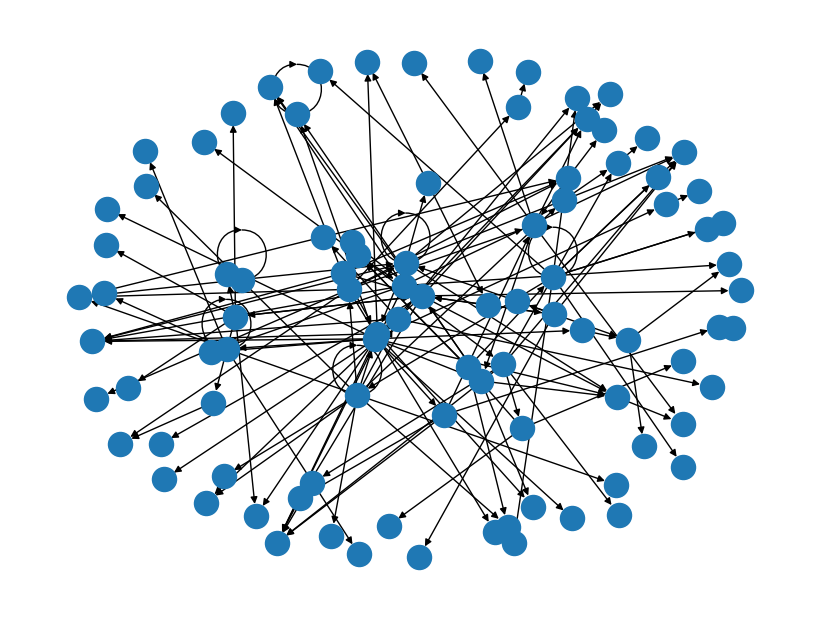

In [141]:
plt.figure(figsize=(8, 6))
nx.draw(subgraph)

Path Length Cutoff, $\phi$

In [293]:
# Find reachable nodes within a limited number of hops
start_node = '23-1011.00'
phi = 7
reachable_nodes = [node for node, path_length in nx.single_source_shortest_path_length(DG, start_node, cutoff=phi).items()]


In [294]:
nx.single_source_shortest_path_length(DG, start_node, cutoff=phi)

{'23-1011.00': 0}

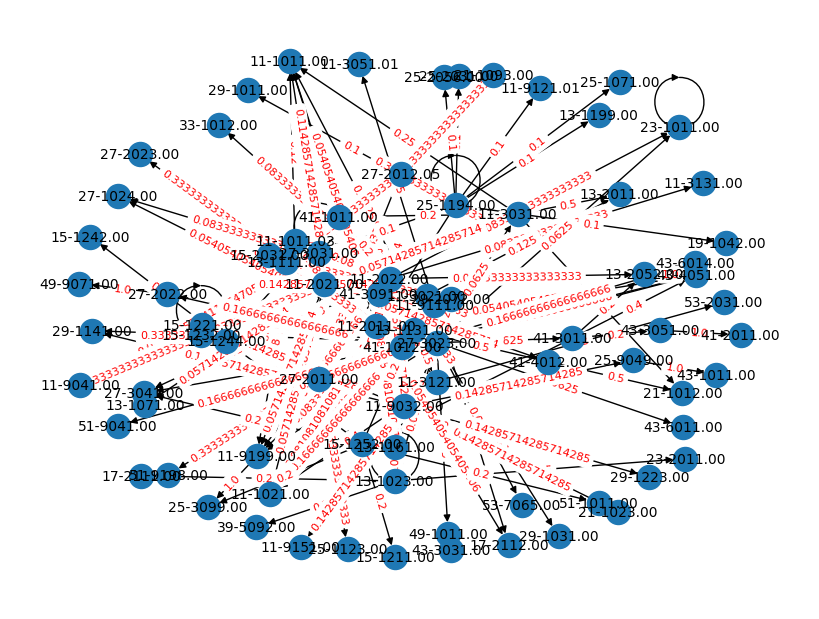

In [229]:
# Create a subgraph with only reachable nodes
subgraph = DG.subgraph(reachable_nodes)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)  # positions for all nodes
nx.draw(subgraph, pos,  with_labels = True, font_size=10,width=1.0, alpha=1)

# Draw edge labels
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels,font_color='red', font_size=8, label_pos=0.5)

plt.show()


##### Example of single_source_shortest_path_length

In [216]:
# Create a directed graph (example)
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (2, 5), (5, 6)])

# Compute shortest path lengths from source node 1 with a maximum hop limit of 7
source = 1
cutoff = 7
shortest_paths = nx.single_source_shortest_path_length(G, source, cutoff)

print("Shortest path lengths from source node {} within {} hops:".format(source, cutoff))
print(shortest_paths)

Shortest path lengths from source node 1 within 7 hops:
{1: 0, 2: 1, 3: 2, 5: 2, 6: 3}


#### 2.3 Minimum of 30 Transitions FROM the occupation 

In [238]:
# We create OSNs for these nodes only (for now)
source_nodes = transitions[transitions.sum(axis = 1) >30 ].index.to_list()

In [239]:
source_nodes

['11-1011.03', '11-2011.00', '11-2021.00', '11-9179.02', '41-9099.00']

In [240]:
# OSN for the source nodes of our interest. 
def OSN(start_node, phi):
    return nx.single_source_shortest_path_length(DG, start_node, cutoff=phi)

In [246]:
osn = []
for i in source_nodes: 
    osn.append(OSN(i,phi))

In [265]:
len(osn)

5

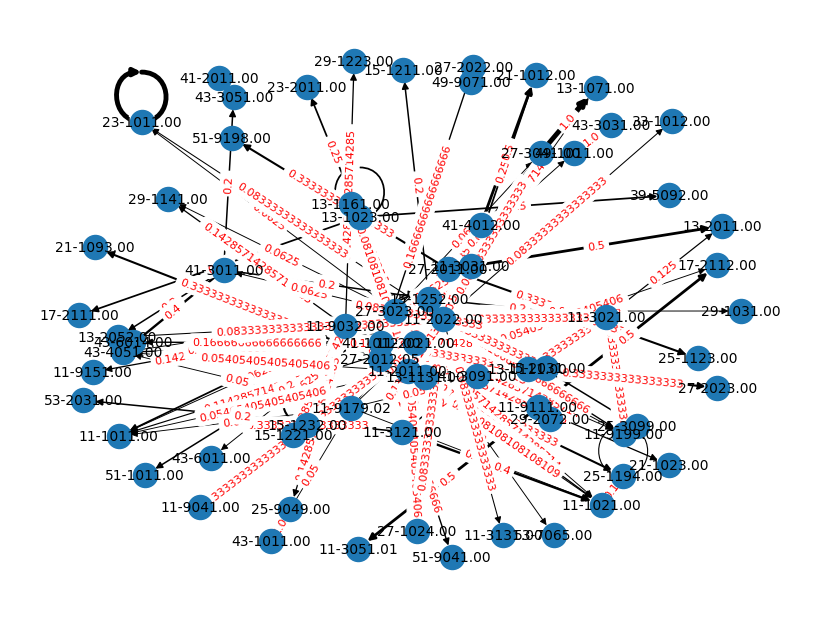

In [298]:
# Visualize 

reachable_nodes = [node for node,   path_length in osn[3].items()]

# Create a subgraph with only reachable nodes
subgraph = DG.subgraph(reachable_nodes)

# Define positions for the nodes (optional, for better visualization)
pos = nx.spring_layout(subgraph)  # positions for all nodes

# Extract edge weights as a dictionary
edge_labels = nx.get_edge_attributes(subgraph, 'weight')
# Define edge widths based on the edge weights
edge_widths = [0.5 + 3 * weight for weight in edge_labels.values()]  # You can adjust this scaling factor as needed

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(subgraph, pos,  with_labels = True, font_size=10,width=edge_widths, alpha=1)

# Draw edge labels
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels,font_color='red', font_size=8, label_pos=0.5)

plt.show()



Check if 23-1011.00 has a self-loop of probab == 1. We can check that there was only 1 case for this. 

In [299]:
edge_labels

{('41-3091.00', '11-2021.00'): 0.5,
 ('41-3091.00', '11-9111.00'): 0.5,
 ('11-3031.00', '11-1011.00'): 0.25,
 ('11-3031.00', '13-2011.00'): 0.5,
 ('11-3031.00', '21-1012.00'): 0.25,
 ('15-1221.00', '15-1232.00'): 1.0,
 ('11-3021.00', '11-2022.00'): 0.08333333333333333,
 ('11-3021.00', '11-9199.00'): 0.08333333333333333,
 ('11-3021.00', '13-1111.00'): 0.08333333333333333,
 ('11-3021.00', '13-2011.00'): 0.125,
 ('11-9032.00', '11-2022.00'): 0.14285714285714285,
 ('11-9032.00', '11-9151.00'): 0.14285714285714285,
 ('11-9032.00', '15-1221.00'): 0.14285714285714285,
 ('11-9032.00', '21-1023.00'): 0.14285714285714285,
 ('11-9032.00', '25-9049.00'): 0.14285714285714285,
 ('11-9032.00', '29-1141.00'): 0.14285714285714285,
 ('11-9032.00', '29-1223.00'): 0.14285714285714285,
 ('13-1131.00', '11-2022.00'): 0.5,
 ('13-1131.00', '11-3121.00'): 0.5,
 ('27-2022.00', '49-9071.00'): 1.0,
 ('43-6014.00', '43-4051.00'): 1.0,
 ('27-2011.00', '25-1123.00'): 0.3333333333333333,
 ('27-2011.00', '27-2012.05')

In [278]:
for edge, value in edge_labels.items():
    if '23-1011.00' in edge:
        print("Tuple:", edge, ", Value:", value)

Tuple: ('23-1011.00', '23-1011.00') , Value: 1.0
Tuple: ('27-3023.00', '23-1011.00') , Value: 0.0625
Tuple: ('11-2022.00', '23-1011.00') , Value: 0.08333333333333333


In [284]:
normalized_transitions_mod[normalized_transitions_mod.index == '23-1011.00']>0

,11-1011.00,11-1011.03,11-1021.00,11-1031.00,11-2011.00,11-2021.00,11-2022.00,11-2032.00,11-2033.00,11-3012.00,...,55-2012.00,55-2013.00,55-3011.00,55-3012.00,55-3013.00,55-3014.00,55-3015.00,55-3016.00,55-3018.00,55-3019.00
ONET (row->col),,,,,,,,,,,,,,,,,,,,,
23-1011.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [297]:
transitions.loc['23-1011.00'].sum()

1

---

## Big Data

In [2]:
df = pd.read_csv("Lightcast US Profiles\profiles_jobs\data\data_0_0_0.csv")

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ewp\AppData\Local\Temp\ipykernel_43892\50944547.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("Lightcast US Profiles\profiles_jobs\data\data_0_0_0.csv")
C:\Users\ewp\AppData\Local\Temp\ipykernel_43892\50944547.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("Lightcast US Profiles\profiles_jobs\data\data_0_0_0.csv")


NameError: name 'pd' is not defined

In [4]:
df

,ID,TITLE_RAW,COMPANY_RAW,START_DATE,END_DATE,COMPANY,COMPANY_NAME,NAICS6_NAME,NAICS6,TITLE,...,SOC_2021_4_NAME,SOC_2021_5_NAME,SOC_2021_2,SOC_2021_3,SOC_2021_4,SOC_2021_5,NAICS_2017_6,NAICS_2017_6_NAME,NAICS_2022_6,NAICS_2022_6_NAME
0,8U4A644SYg4x2G0Pqji6BA_0000,account supervisor,afakrause,2011-12-01,2014-10-01,81319041.0,Afakrause,NaN,NaN,ETAD087247CEBE7990,...,"Sales Representatives, Wholesale and Manufactu...","Sales Representatives, Wholesale and Manufactu...",41-0000,41-4000,41-4010,41-4012,NaN,NaN,999999,Unclassified Industry
1,8U4A644SYg4x2G0Pqji6BA_0000,account manager,afakrause,2008-11-01,2011-11-01,81319041.0,Afakrause,NaN,NaN,ET3155900D80932338,...,Customer Service Representatives,Customer Service Representatives,43-0000,43-4000,43-4050,43-4051,NaN,NaN,999999,Unclassified Industry
2,8U4A644SYg4x2G0Pqji6BA_0000,president,afakrause,2020-08-01,NaN,81319041.0,Afakrause,NaN,NaN,ETED359E6D08B6810D,...,Chief Executives,Chief Executives,11-0000,11-1000,11-1010,11-1011,NaN,NaN,999999,Unclassified Industry
3,8U4A644SYg4x2G0Pqji6BA_0000,"vice president, account services",afakrause,2014-11-01,2020-08-01,81319041.0,Afakrause,NaN,NaN,ETECB36009B8CD98F8,...,Marketing and Sales Managers,Sales Managers,11-0000,11-2000,11-2020,11-2022,NaN,NaN,999999,Unclassified Industry
4,qzZzCqcYWbJKrn12ri9mrg_0000,financial advisor,medical office,NaN,NaN,40050285.0,Medical Office,Offices of Physicians (except Mental Health Sp...,621111.0,ETF27C4D9C94A7F49A,...,Financial Analysts and Advisors,Personal Financial Advisors,13-0000,13-2000,13-2050,13-2052,621111.0,Offices of Physicians (except Mental Health Sp...,621111,Offices of Physicians (except Mental Health Sp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973422,0YDmJK8YECbdnN8NQQ2XQg_0000,project manager,invertice,2016-02-01,2018-08-01,3315318.0,Invertice,"All Other Professional, Scientific, and Techni...",541990.0,ET6DC0C7447DC6E327,...,Logisticians and Project Management Specialists,Project Management Specialists,13-0000,13-1000,13-1080,13-1082,541990.0,"All Other Professional, Scientific, and Techni...",541990,"All Other Professional, Scientific, and Techni..."
2973423,0YDmJK8YECbdnN8NQQ2XQg_0000,ceo / president,niksen inc,2018-08-01,NaN,33344705.0,Niksen,Power and Communication Line and Related Struc...,237130.0,ET5772B6651B716807,...,Chief Executives,Chief Executives,11-0000,11-1000,11-1010,11-1011,237130.0,Power and Communication Line and Related Struc...,237130,Power and Communication Line and Related Struc...
2973424,0YDmJK8YECbdnN8NQQ2XQg_0000,owner / president,uni tekk llc,2013-03-01,2015-03-01,NaN,NaN,NaN,NaN,ET0AF3194FB6236341,...,General and Operations Managers,General and Operations Managers,11-0000,11-1000,11-1020,11-1021,NaN,NaN,999999,Unclassified Industry
2973425,0YDmJK8YECbdnN8NQQ2XQg_0000,owner,crss inc,2007-01-01,NaN,35370678.0,Crss,NaN,NaN,ET910CD9EB96B2AA31,...,Chief Executives,Chief Executives,11-0000,11-1000,11-1010,11-1011,NaN,NaN,999999,Unclassified Industry


In [323]:
df.columns

Index(['ID', 'TITLE_RAW', 'COMPANY_RAW', 'START_DATE', 'END_DATE', 'COMPANY',
       'COMPANY_NAME', 'NAICS6_NAME', 'NAICS6', 'TITLE', 'TITLE_NAME', 'ONET',
       'ONET_NAME', 'CITY_RAW', 'STATE_RAW', 'NATION_RAW', 'IS_CURRENT',
       'ONET_2019', 'ONET_2019_NAME', 'SOC_2_NAME', 'SOC_3_NAME', 'SOC_4_NAME',
       'SOC_5_NAME', 'SOC_2', 'SOC_3', 'SOC_4', 'SOC_5', 'SOC_2021_2_NAME',
       'SOC_2021_3_NAME', 'SOC_2021_4_NAME', 'SOC_2021_5_NAME', 'SOC_2021_2',
       'SOC_2021_3', 'SOC_2021_4', 'SOC_2021_5', 'NAICS_2017_6',
       'NAICS_2017_6_NAME', 'NAICS_2022_6', 'NAICS_2022_6_NAME'],
      dtype='object')